# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
# YOUR CODE HERE
url = "http://api.openweathermap.org/data/2.5/weather" 

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    # YOUR CODE HERE
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric" 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"] # YOUR CODE HERE
        city_lng = city_weather["coord"]["lon"] # YOUR CODE HERE
        city_max_temp = city_weather["main"]["temp_max"] # YOUR CODE HERE
        city_humidity = city_weather["main"]["humidity"] # YOUR CODE HERE
        city_clouds = city_weather["clouds"]["all"] # YOUR CODE HERE
        city_wind = city_weather["wind"]["speed"] # YOUR CODE HERE
        city_country = city_weather["sys"]["country"] # YOUR CODE HERE
        city_date = city_weather["dt"] # YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | blackmans bay
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | bayonne
Processing Record 4 of Set 1 | mumford
Processing Record 5 of Set 1 | port mathurin
Processing Record 6 of Set 1 | dudinka
Processing Record 7 of Set 1 | midvagur
Processing Record 8 of Set 1 | mejit
Processing Record 9 of Set 1 | borogontsy
Processing Record 10 of Set 1 | leeton
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | acarau
Processing Record 13 of Set 1 | dazhou
Processing Record 14 of Set 1 | ilulissat
Processing Record 15 of Set 1 | saipan
Processing Record 16 of Set 1 | ilebo
Processing Record 17 of Set 1 | bilibino
Processing Record 18 of Set 1 | vorgashor
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | burnie
Processing Record 22 of Set 1 | uturoa
Processing Record 23 of Set 1 | taiohae
Ci

In [4]:
# Convert the cities weather data into a Pandas DataFrame
# YOUR CODE HERE
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,12.63,71,78,0.45,AU,1717736463
1,bredasdorp,-34.5322,20.0403,12.48,82,100,1.96,ZA,1717736378
2,bayonne,43.3333,-1.4167,16.35,94,100,1.54,FR,1717736241
3,mumford,5.2618,-0.7590,25.59,88,100,2.57,GH,1717736521
4,port mathurin,-19.6833,63.4167,23.79,63,76,10.60,MU,1717736385


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities2.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

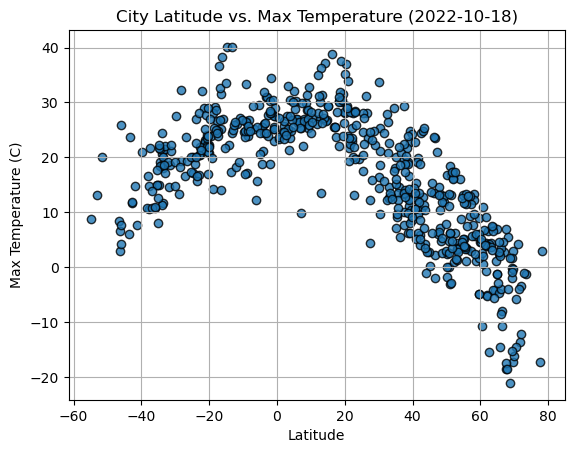

In [30]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Max Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

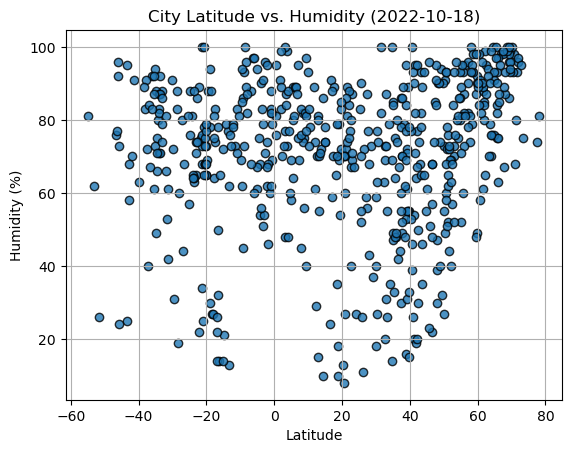

In [9]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

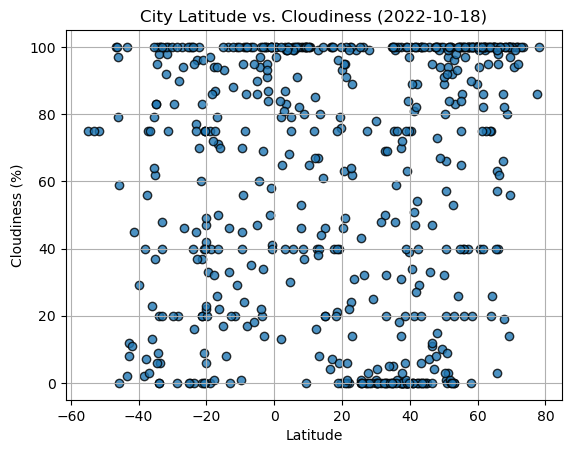

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

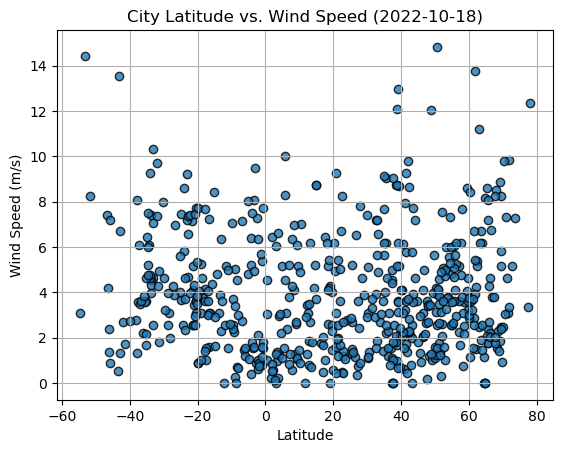

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [39]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, hemisphere):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (min(x_values)+5, min(y_values)+5), fontsize=15, color="red")
    plt.title(f"{hemisphere} Hemisphere: {title}")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


In [40]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [41]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8462548186825359


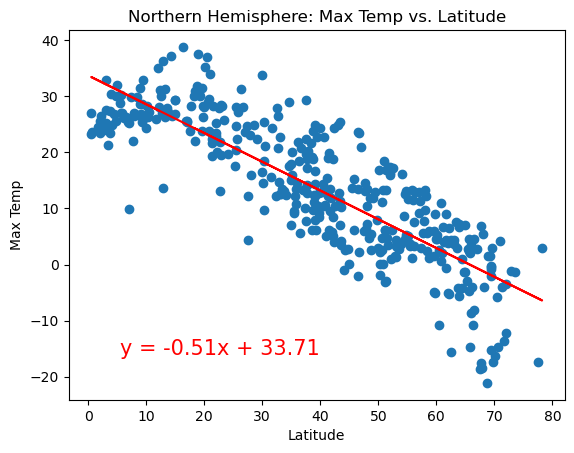

In [42]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Linear regression calculation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"


# Printing the r-value
print(f"The r-value is: {rvalue}")

# Plotting the data
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Max Temp vs. Latitude", "Latitude", "Max Temp", "Northern")


The r-value is: 0.6419546065421794


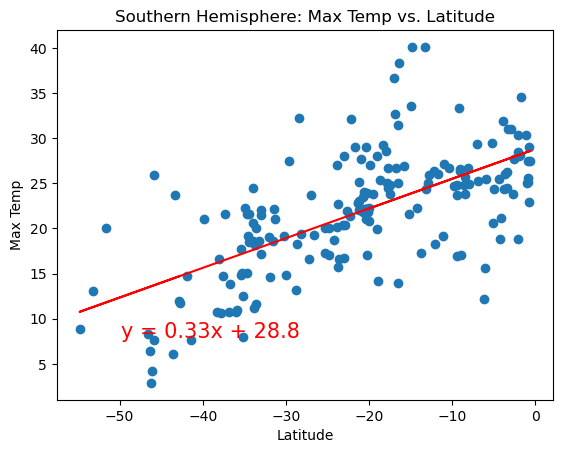

In [43]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Linear regression calculation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"


# Printing the r-value
print(f"The r-value is: {rvalue}")

# Plotting the data
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Max Temp vs. Latitude", "Latitude", "Max Temp", "Southern")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.23853179129394056


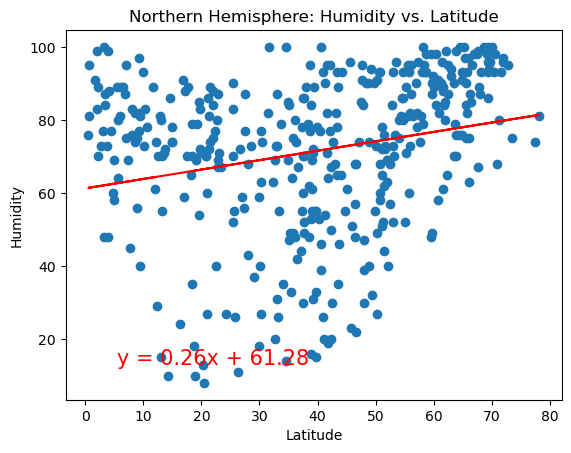

In [44]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Linear regression calculation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"


# Printing the r-value
print(f"The r-value is: {rvalue}")

# Plotting the data
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Humidity vs. Latitude", "Latitude", "Humidity", "Northern")

The r-value is: 0.0167593169500568


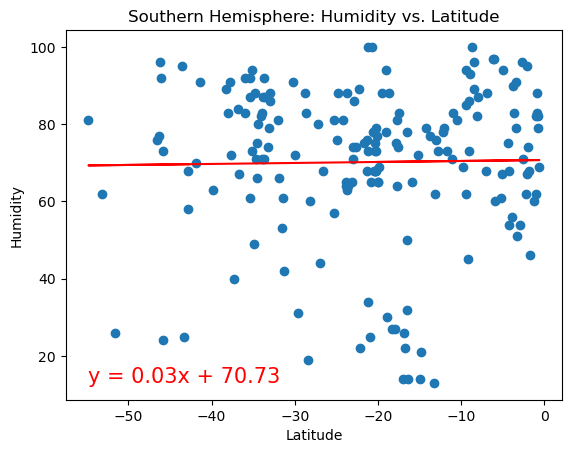

In [25]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Linear regression calculation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"


# Printing the r-value
print(f"The r-value is: {rvalue}")

# Plotting the data
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Humidity vs. Latitude", "Latitude", "Humidity", "Southern")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.15500489387697095


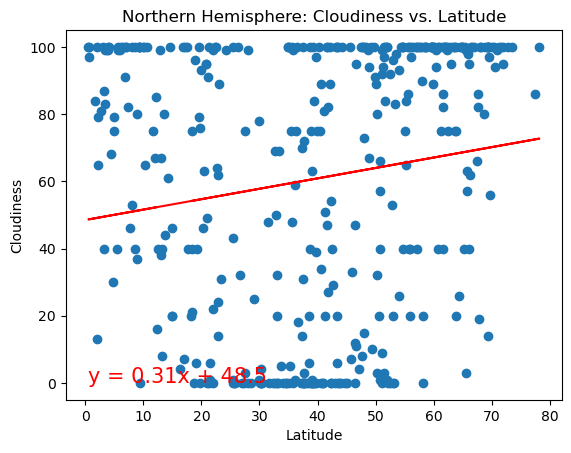

In [26]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Linear regression calculation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"


# Printing the r-value
print(f"The r-value is: {rvalue}")

# Plotting the data
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Cloudiness vs. Latitude", "Latitude", "Cloudiness", "Northern")

The r-value is: 0.14341322916643243


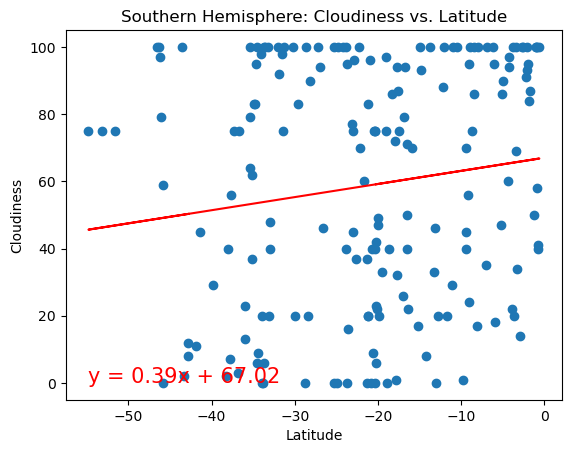

In [27]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Linear regression calculation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"


# Printing the r-value
print(f"The r-value is: {rvalue}")

# Plotting the data
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Cloudiness vs. Latitude", "Latitude", "Cloudiness", "Southern")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.17434667290903333


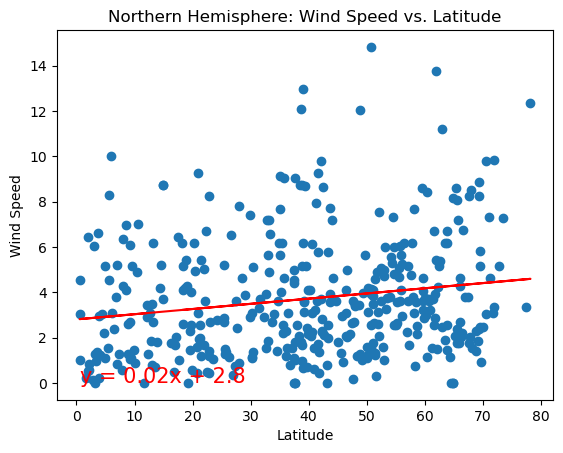

In [28]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Linear regression calculation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"


# Printing the r-value
print(f"The r-value is: {rvalue}")

# Plotting the data
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Wind Speed vs. Latitude", "Latitude", "Wind Speed", "Northern")

The r-value is: -0.24947753546264587


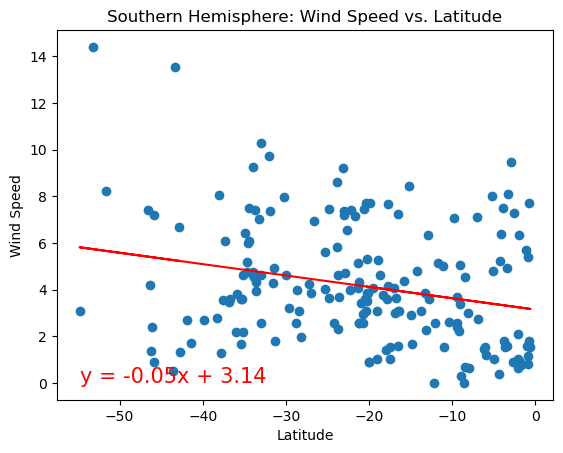

In [29]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Linear regression calculation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"


# Printing the r-value
print(f"The r-value is: {rvalue}")

# Plotting the data
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Wind Speed vs. Latitude", "Latitude", "Wind Speed", "Southern")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
**Discussion about the linear relationship:**

**Latitude vs. Temperature**

- **Northern Hemisphere**: 
    As latitude increases, the maximum temperature decreases. 
    The linear regression indicates a negative relationship between temperature and latitude.
- **Southern Hemisphere**: 
    Similarly, as we move away from the equator, the maximum temperature decreases. 
The linear regression confirms a negative relationship between temperature and latitude.

**Latitude vs. Humidity**

- **Northern Hemisphere**: 
There is no significant linear relationship between latitude and humidity. 
The data points are widely scattered.
- **Southern Hemisphere**: 
There is no strong relationship between humidity and latitude. 
The data points are also widely scattered.

**Latitude vs. Cloudiness**

- **Northern Hemisphere**: 
There is no clear relationship between cloudiness and latitude. 
The data points are scattered.
- **Southern Hemisphere**: 
There is no distinct trend between cloudiness and latitude. 
The data points are widely spread.

**Latitude vs. Wind Speed**

- **Northern Hemisphere**: 
There is no strong linear relationship between wind speed and latitude. 
Wind speeds vary greatly at different latitudes.
- **Southern Hemisphere**: 
There is no clear relationship between wind speed and latitude. 
The data points are scattered widely.

**General Observations**

- **Temperature vs. Latitude**: 
This shows the most significant linear relationship, with temperature generally decreasing as latitude increases.
- **Humidity, Cloudiness, and Wind Speed vs. Latitude**: 
These weather variables show weak or no linear relationships with latitude, indicating they are influenced by more complex factors than just latitude.


In [ ]:
"""
Discussion About the Linear Relationship

Latitude vs. Temperature

Northern Hemisphere: 
As latitude increases, the maximum temperature decreases. 
The linear regression indicates a negative relationship between temperature and latitude.
Southern Hemisphere: 
Similarly, as we move away from the equator, the maximum temperature decreases. 
The linear regression confirms a negative relationship between temperature and latitude.

Latitude vs. Humidity

Northern Hemisphere: 
There is no significant linear relationship between latitude and humidity. 
The data points are widely scattered.
Southern Hemisphere: 
There is no strong relationship between humidity and latitude. 
The data points are also widely scattered.

Latitude vs. Cloudiness

Northern Hemisphere: 
There is no clear relationship between cloudiness and latitude. 
The data points are scattered.
Southern Hemisphere: 
There is no distinct trend between cloudiness and latitude. 
The data points are widely spread.

Latitude vs. Wind Speed

Northern Hemisphere: 
There is no strong linear relationship between wind speed and latitude. 
Wind speeds vary greatly at different latitudes.
Southern Hemisphere: 
There is no clear relationship between wind speed and latitude. 
The data points are scattered widely.

General Observations

Temperature vs. Latitude: 
This shows the most significant linear relationship, with temperature generally decreasing as latitude increases.
Humidity, Cloudiness, and Wind Speed vs. Latitude: 
These weather variables show weak or no linear relationships with latitude, indicating they are influenced by more complex factors than just latitude.
"""